# Deskripsi Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [16]:
df = pd.read_csv('toyota.csv')

# Deskripsi Datast

In [17]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


# Mengecek HeatMap
apakah ada null atau tidak

<Axes: >

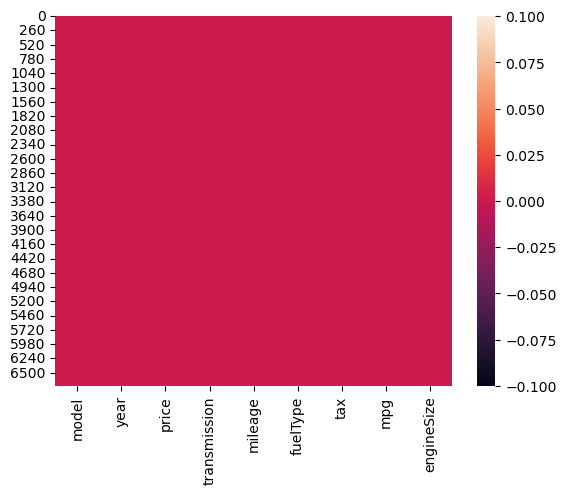

In [19]:
sns.heatmap(df.isnull())

Untuk melihat rata-rata dari dataset

In [20]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [23]:
df.dtypes


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [24]:
df.select_dtypes(include=['number'])

,year,price,mileage,tax,mpg,engineSize
0,2016,16000,24089,265,36.2,2.0
1,2017,15995,18615,145,36.2,2.0
2,2015,13998,27469,265,36.2,2.0
3,2017,18998,14736,150,36.2,2.0
4,2017,17498,36284,145,36.2,2.0
...,...,...,...,...,...,...
6733,2011,5500,30000,20,58.9,1.0
6734,2011,4985,36154,125,50.4,1.3
6735,2012,4995,46000,125,57.6,1.4
6736,2011,3995,60700,125,50.4,1.3


# Visualisasi Data

<Axes: >

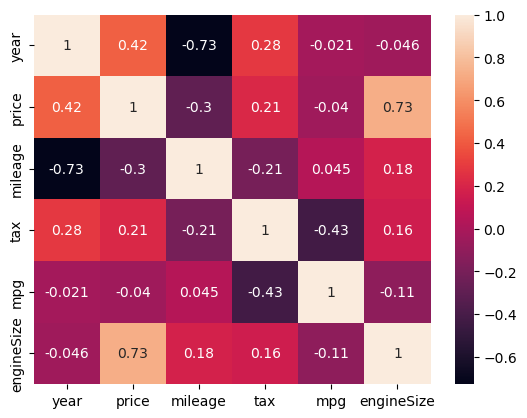

In [37]:
# plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

# Jumlah mobil berdasarkan model

In [40]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

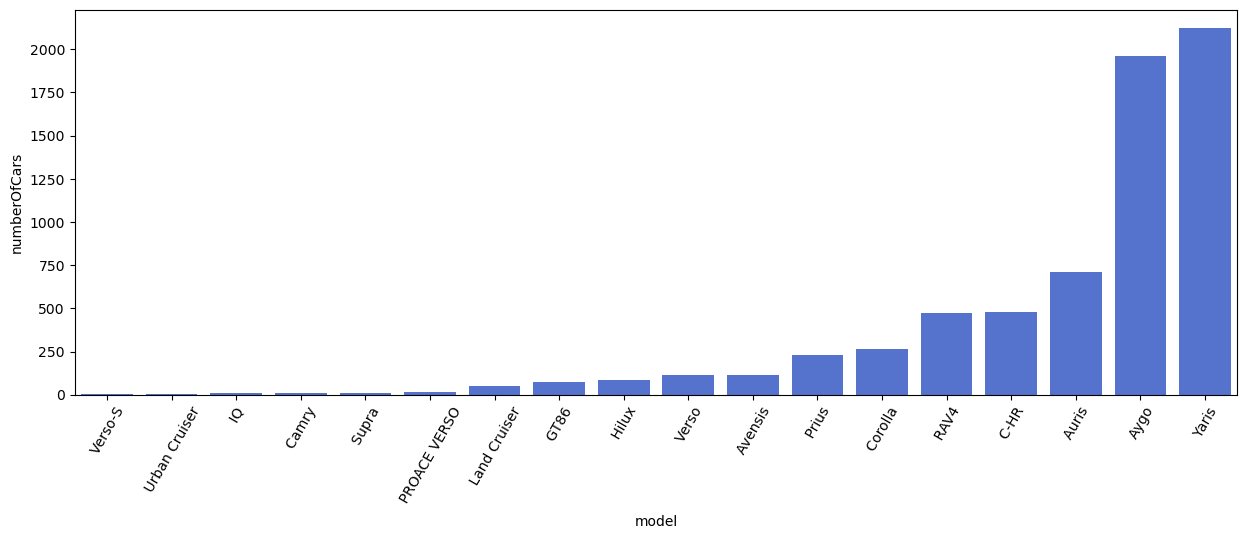

In [42]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

# Ukuran Mesin

In [43]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

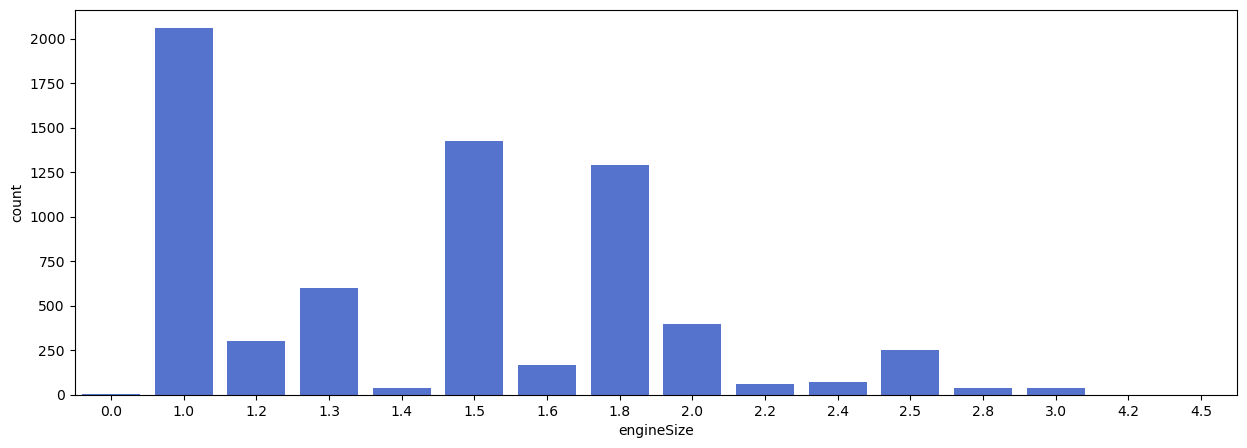

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# Distribusi Mileage

/var/folders/cc/fc8j01v5641fx1tc6_mmqfjc0000gn/T/ipykernel_25008/148899218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

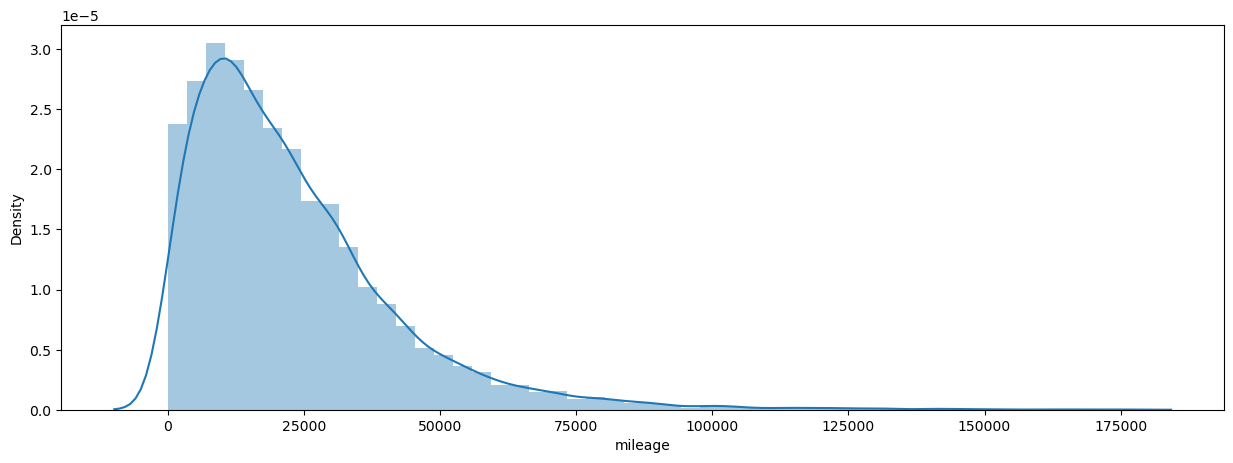

In [49]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

#   Distribusi Harga Mobil

/var/folders/cc/fc8j01v5641fx1tc6_mmqfjc0000gn/T/ipykernel_25008/3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

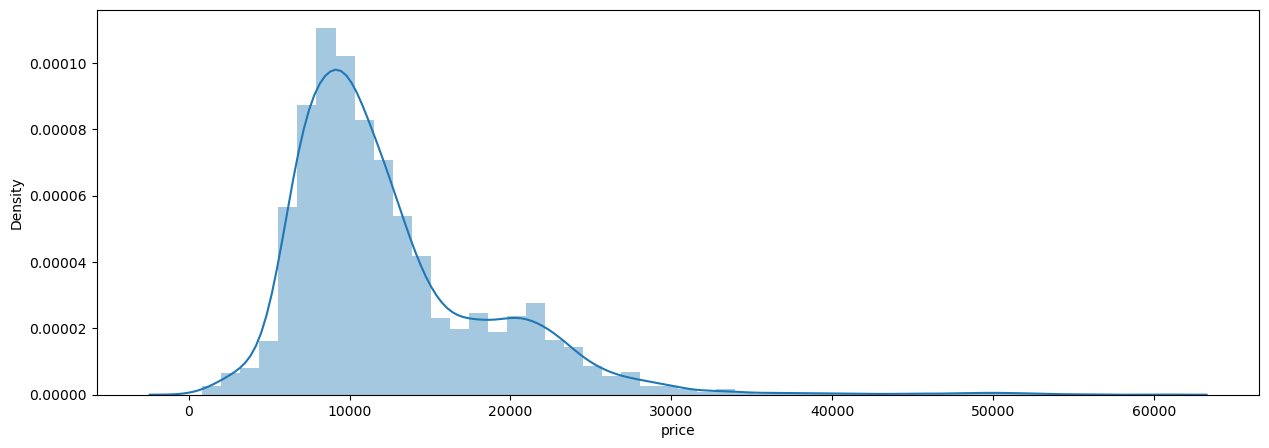

In [51]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# Seleksi Fitur
karena pada dataset tidak semua atribut digunakan

In [52]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

# Split Data
membagi data ke data training dan data testing

In [56]:
# Libary
from sklearn.model_selection import train_test_split

# Mengambil data testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

# Membuat Model Regresi Linier

In [59]:
# Memanggil model dari sklearn yg digunakan utk regresi

from sklearn.linear_model import  LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

# Untuk prediksi
pred = lr.predict(x_test)

# Data training sudah berhasil diolah menggunakan model regresi linier

In [60]:
# Mengecek akurasi dari model
score = lr.score(x_test, y_test)
print('Akurasi model regresi linier : ', score)

Akurasi model regresi linier :  0.7678983314475181


# Membuat Inputan Model Regresi Linier

In [64]:
# year, mileage, tax, mpg, engineSize
input_data = np.array([[2019, 5000, 143,30.2, 2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [21210.3441194]


/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save model

In [65]:
import pickle
filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))